In [2]:
import nbodykit.lab as nlab

In [5]:
Plin = nlab.cosmology.EHPower(nlab.cosmology.Planck15, redshift=0)

In [78]:
cat = nlab.LogNormalCatalog(Plin=Plin, nbar=1e-3, BoxSize=1024., seed=33333, Nmesh=128)

In [79]:
cat['Position'] = cat['Position'] + cat['VelocityOffset'] * [0, 0, 1]

In [80]:
r = nlab.FFTPower(cat, mode='2d')

In [81]:
r.save('fftpower-result.dat')

In [82]:
r = nlab.FFTPower.load('fftpower-result.dat')

In [83]:
%matplotlib notebook
from matplotlib.pyplot import figure

In [84]:
r.power.sel(mu=0.5)

<DataSet: dims: (k: 64), variables: ('k', 'mu', 'power', 'modes')>

<IPython.core.display.Javascript object>


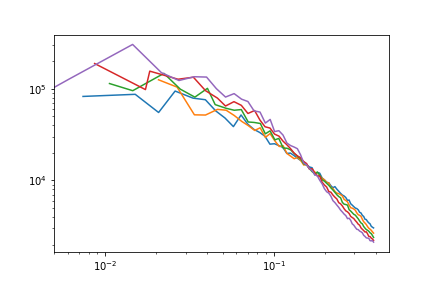

In [85]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(r.power['k'], abs(r.power['power']))
#ax.plot(r.power.sel(mu=0.5)['k'], abs(r.power.sel(mu=0.5)['power']))
ax.set_yscale('log')
ax.set_xscale('log')